# Importing relevant packages

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [47]:
employees = pd.read_csv('./data/employees-attrition-clean.csv', index_col = "Unnamed: 0")
employees.head()

,Age,Attrition,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,WorkLifeBalance,YearsAtCompany
0,41,Churned,1,College,Life Sciences,Good,Female,Great,Excellent,5993,11,Great,Low,80,Low,6
1,49,Stayed,8,Below College,Life Sciences,Great,Male,Good,Good,5130,23,Excellent,Excellent,80,Great,10
2,37,Churned,2,College,Other,Excellent,Male,Good,Great,2090,15,Great,Good,80,Great,0
3,33,Stayed,3,Master's degree,Life Sciences,Excellent,Female,Great,Great,2909,11,Great,Great,80,Great,8
4,27,Stayed,2,Below College,Medical,Low,Male,Great,Good,3468,12,Great,Excellent,80,Great,2


In [48]:
employees.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

## Employees Distribution by Age

Text(0.5, 1.0, 'Age distribution of Employees')

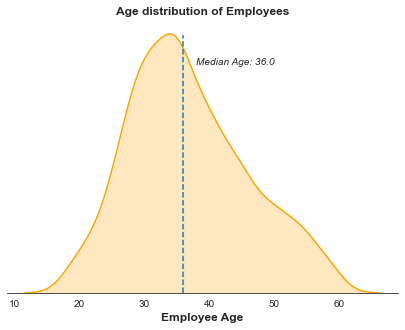

In [28]:
sns.set_style('white')
plt.figure(figsize=(7, 5), )

# Create plot
sns.distplot(employees['Age'], color='orange', kde_kws={'shade': True}, hist=False)

plt.axvline(employees['Age'].median(), ymax=0.95, linestyle = "--")

# Add median age of all employees
plt.text(employees['Age'].median() + 2, 0.04, "Median Age: " + str(employees['Age'].median()), style='italic', fontsize=10)

sns.despine(left = True)

plt.yticks([])
plt.xlabel('Employee Age', fontsize = 12, fontweight='semibold')
plt.title('Age distribution of Employees', fontsize= 12, fontweight='semibold')


## Employees Distribution by Age and Genre

In [29]:
# Subset on males and compute their median age
male_churn = employees[employees['Gender'] == "Male"]
median_male_age = male_churn['Age'].median()

# Subset on females and compute their median age
female_churn = employees[employees['Gender'] == "Female"]
median_female_age = female_churn['Age'].median()

Text(0.5, 0.98, 'Age distribution by gender')

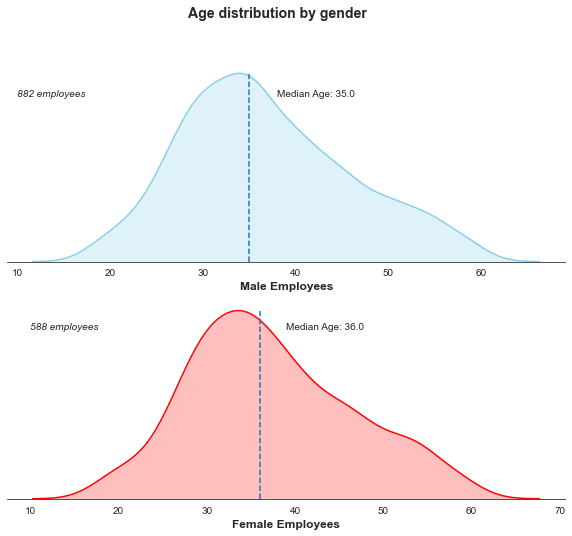

In [30]:
# Set initial plot options
sns.set_style('white')

# Create figure and axes
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.distplot(employees['Age'], color = 'skyblue', kde_kws= {'shade': True}, hist = False, ax = axes[0])

# Add vertical line for men median
axes[0].axvline(median_male_age, ymax = 0.95, linestyle='--')
axes[0].text(median_male_age + 3, 0.04, 'Median Age: ' + str(median_male_age))

axes[0].text(10, 0.04, str(male_churn.shape[0]) + " employees", fontsize = 10, style= 'italic')

# Format subplot
axes[0].set_yticks([])
axes[0].set_xlabel('Male Employees', fontsize= 12, fontweight = 'semibold')

# Create plot of female age distribution on second axes
sns.distplot(female_churn['Age'], color = 'r', kde_kws= {'shade': True}, hist = False, ax = axes[1])

# Add vertical line for female median
axes[1].axvline(median_female_age, ymax =0.95, linestyle='--')
axes[1].text(median_female_age + 3, 0.04, 'Median Age: ' + str(median_female_age))

# Add number of female employees for context
axes[1].text(10, 0.04, str(female_churn.shape[0]) + " employees", fontsize = 10, style= 'italic')
axes[1].set_yticks([])
axes[1].set_xlabel('Female Employees', fontsize= 12, fontweight = 'semibold')

sns.despine(left=True)
fig.suptitle('Age distribution by gender', fontsize=14, fontweight = 'semibold')



## Employees Distribution by Education

Text(0.5, 1.0, 'Distribution of Education Fields by Gender')

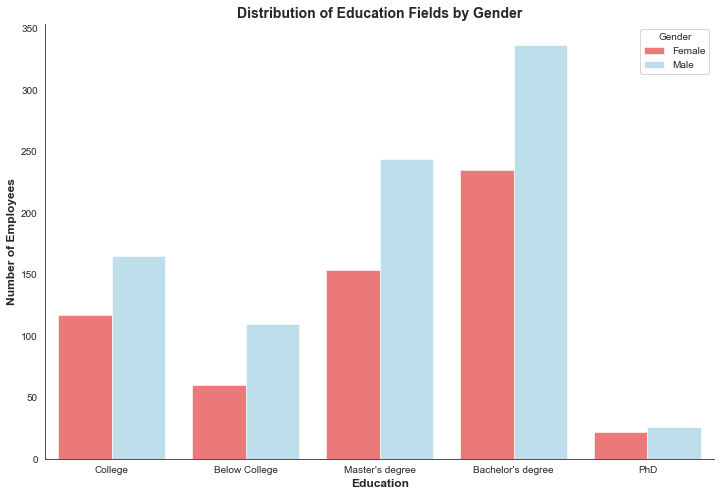

In [33]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (12, 8))

# Create a countplot
sns.countplot(x ='Education', hue='Gender', 
              data=employees,
              palette=['r', 'skyblue'],
              alpha=0.6
              )

sns.despine()

# Final styling touche
plt.ylabel('Number of Employees', fontsize=12, fontweight='semibold')
plt.xlabel('Education', fontsize=12, fontweight='semibold')
plt.title('Distribution of Education Fields by Gender', fontweight='semibold', fontsize=14)


## Age and Distance impact to Churn

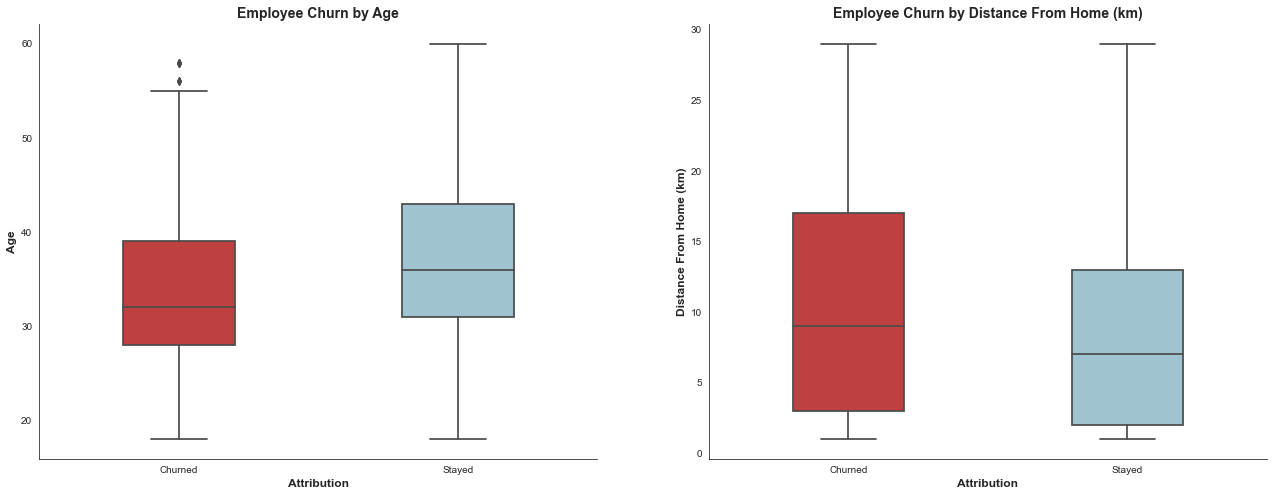

In [37]:
# Set initial plot options
sns.set_style('white')

# Create helper lists
columns_to_plot = ['Age', "DistanceFromHome"]
titles_to_plot = ["Age", "Distance From Home (km)"]

fig, axes = plt.subplots(1,2, figsize = (22, 8))

# Iterate axes, and plot a boxplot
for ax, column, title in zip(axes, columns_to_plot, titles_to_plot):
  
  sns.boxplot(x= 'Attrition', y = column, data=employees,
              order = ['Churned', 'Stayed'], ax = ax, width=0.4, linewidth=1.75, palette=['r', 'skyblue'], saturation=0.5)
    
  sns.despine()

  ax.set_xlabel('Attribution', fontsize= 12, fontweight='semibold')
  ax.set_ylabel(title, fontsize = 12, fontweight = 'semibold')
  ax.set_title('Employee Churn by ' + title, fontsize = 14, fontweight='semibold')


## Attiction Satisfaction

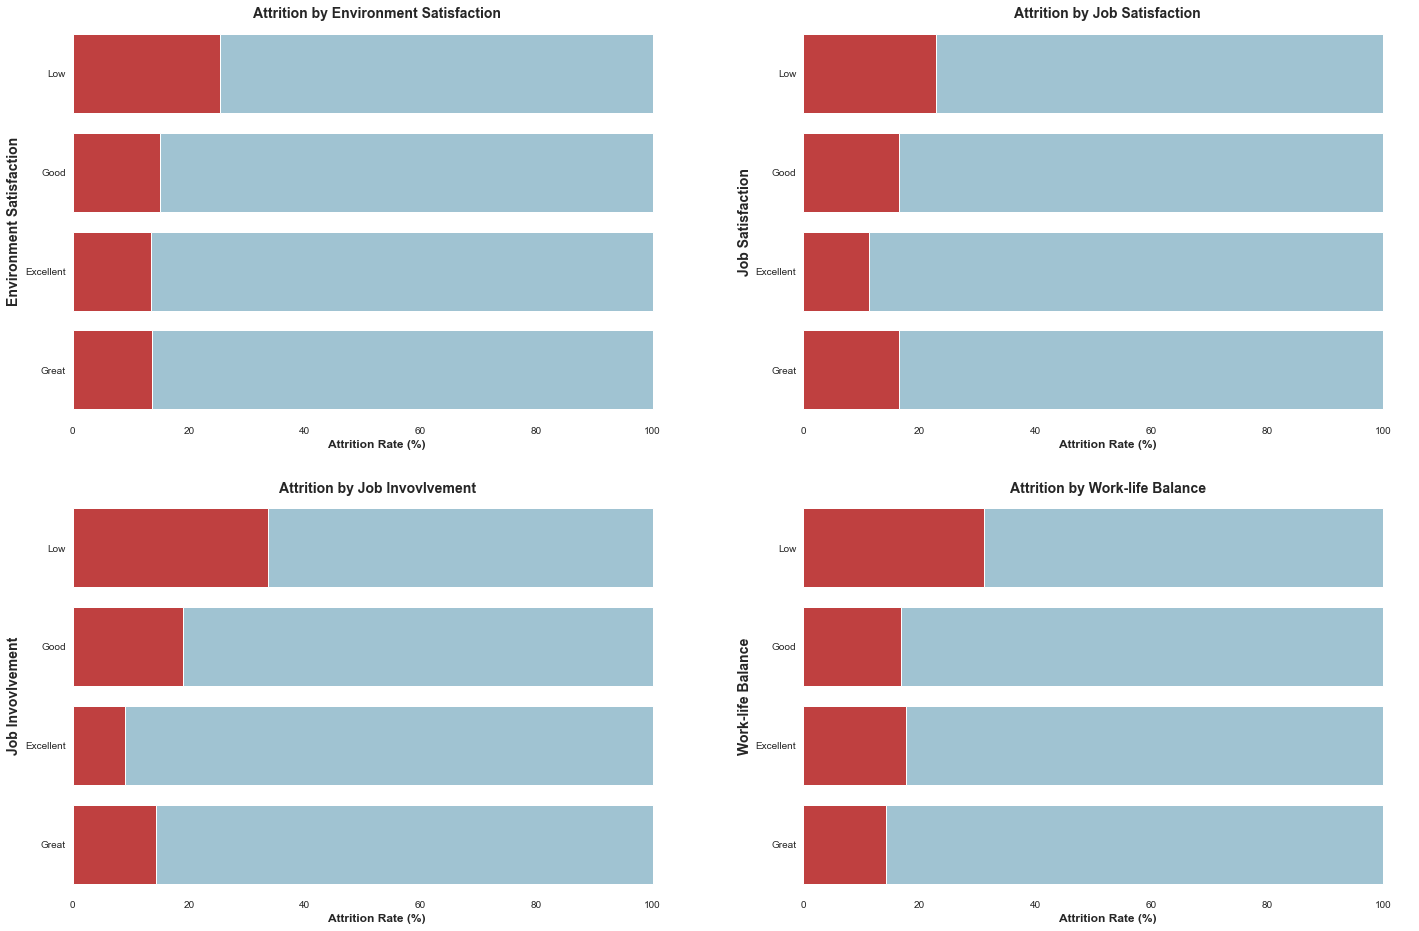

In [40]:
sns.set_style('white')


survey_columns = ["EnvironmentSatisfaction", "JobSatisfaction", "JobInvolvement", "WorkLifeBalance"]
survey_titles = ["Environment Satisfaction", "Job Satisfaction", "Job Invovlvement", "Work-life Balance"]

# Create subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(24, 16))


for ax, survey_question, title in zip(axes.flatten(), survey_columns, survey_titles):
  
  # Crosstab data
  proportions = pd.crosstab(employees[survey_question], employees['Attrition'], normalize='index').reset_index()
  
  # Find percentages
  proportions[['Churned', 'Stayed']] = proportions[['Churned', 'Stayed']] * 100
  proportions['Total'] = proportions['Churned'] + proportions['Stayed']

  # Get total column
  sns.barplot(x = 'Total', y = survey_question, data = proportions, order = ['Low', 'Good', 'Excellent', 'Great'], color = 'skyblue', ax = ax, saturation=0.5)
  sns.barplot(x = 'Churned', y = survey_question, data = proportions, order = ['Low', 'Good', 'Excellent', 'Great'], color = 'r', ax = ax, saturation=0.5)
  
  sns.despine(left= True, bottom=True)
  
  ax.set_title('Attrition by ' + title, fontweight = 'semibold', fontsize = 14)
  ax.set_ylabel(title, fontweight = 'semibold', fontsize = 14)
  ax.set_xlabel('Attrition Rate (%)', fontsize = 12, fontweight = 'semibold')


## Salaries impact to churn

Text(0, 0.5, 'Monthly Income ($)')

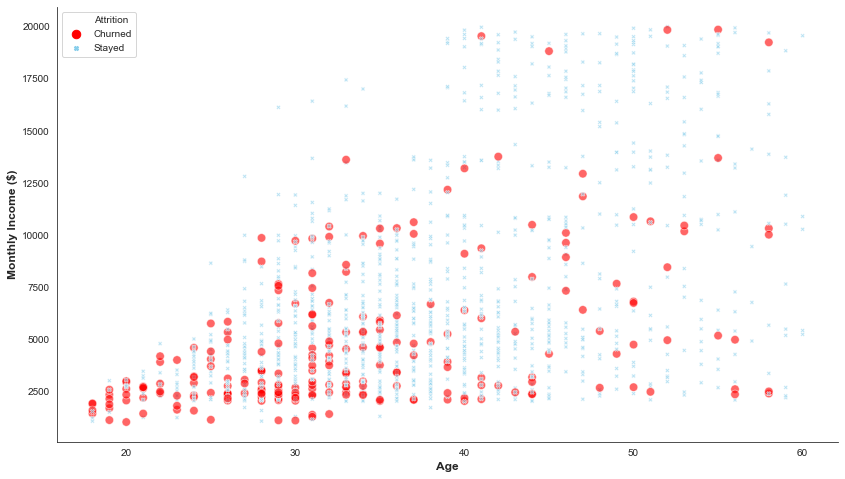

In [42]:
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create scatterplot
sns.scatterplot(x = 'Age', y = 'MonthlyIncome', hue='Attrition', data = employees, size ='Attrition',
                style = 'Attrition', palette=['r', 'skyblue'], alpha = 0.6)

sns.despine()

plt.xlabel('Age', fontsize= 12, fontweight = 'semibold')
plt.ylabel('Monthly Income ($)', fontsize = 12, fontweight = 'semibold')


## Salary raises impact to churn

In [43]:
# Create categories for raises
employees['raise_category'] = pd.cut(employees['PercentSalaryHike'], [10, 15, 20, 25], labels = ['10-15%', '15-20%', '20-25%']) 


Text(0.5, 1.0, 'Salary Hike percentage (%) by Montly Income')

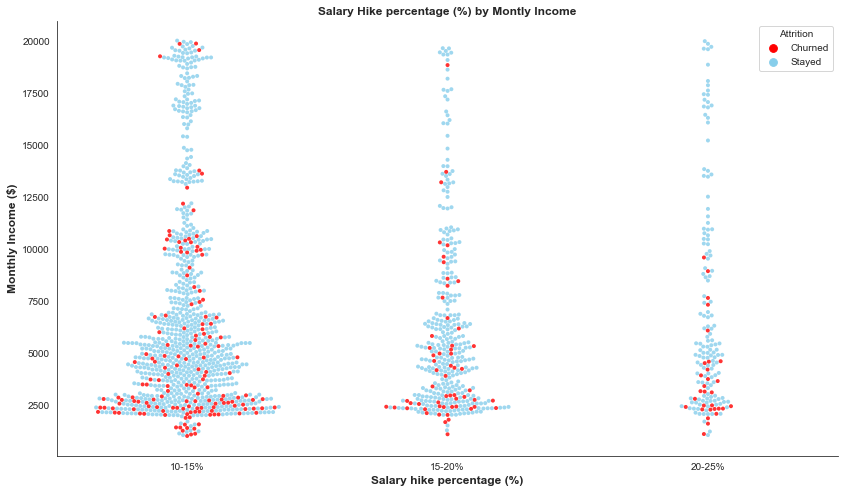

In [45]:
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create swarmplot
sns.swarmplot(x = 'raise_category', y='MonthlyIncome', hue='Attrition', data = employees, size = 4, alpha = 0.8, palette=['r', 'skyblue'])


sns.despine()

plt.xlabel('Salary hike percentage (%)', fontsize=12, fontweight= 'semibold')
plt.ylabel('Monthly Income ($)', fontsize=12, fontweight= 'semibold')
plt.title('Salary Hike percentage (%) by Montly Income', fontsize=12, fontweight= 'semibold')

